# Introduction to Data Science - Homework 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 26, 11:59pm.

This homework is designed to reinforce the skills we covered in weeks 1 and 2: working with loops, conditions, functions, and the built-in Python data structures. We'll also calcluate descriptive statistics, and sample from a distribution. Make sure to go through the lectures again in case you have any troubles.

In this homework we'll do calculations that are also available in NumPy. For Parts 1 and 2, however, **we want you to implement the solutions using standard python functionality and the math library, and then check your results using NumPy**. See the the [NumPy library](http://docs.scipy.org/doc/numpy-1.11.0/reference/routines.statistics.html) documentation, and include the checks as a separate code cell. 


**For Part 3, you should use the SciPy libary, specifically [SciPy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html).** 

## Your Data
Fill out the following information: 

*First Name:*  Aniket 
*Last Name:*   Patil
*E-mail:*   aniket.patil@utah.edu
*UID:*  u1144414


## Part 1: Vector data

We first will work with a vector of yearly average temperatures from New Haven published [here](https://vincentarelbundock.github.io/Rdatasets/datasets.html). The data is included in this repository in the file `nhtmep.csv`.

The data is stored in the CSV format, which is a simple textfile with 'Comma Seperated Values'.
To load the data to into a (nested) python array, we use the [csv](https://docs.python.org/3/library/csv.html) library. The following code reads the file and stores it in a vector:

In [1]:
# import the csv library
import csv
# import the math library we'll use later
import math
# import the numpy library
import numpy as np

# initialize the array
temperature_vector = []

# open the file and append the values of the last column to the array
with open('nhtemp.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # remove the first item as it is the title.
    next(filereader)
    for row in filereader:
        # here we append to the array and also cast from string to float
        temperature_vector.append(float(row[2]))
        
# print the vector to see if it worked
print (temperature_vector)

[49.9, 52.3, 49.4, 51.1, 49.4, 47.9, 49.8, 50.9, 49.3, 51.9, 50.8, 49.6, 49.3, 50.6, 48.4, 50.7, 50.9, 50.6, 51.5, 52.8, 51.8, 51.1, 49.8, 50.2, 50.4, 51.6, 51.8, 50.9, 48.8, 51.7, 51.0, 50.6, 51.7, 51.5, 52.1, 51.3, 51.0, 54.0, 51.4, 52.7, 53.1, 54.6, 52.0, 52.0, 50.9, 52.6, 50.2, 52.6, 51.6, 51.9, 50.5, 50.9, 51.7, 51.4, 51.7, 50.8, 51.9, 51.8, 51.9, 53.0]


We'll use the `temperature_vector` to calculate a couple of standard statistical measures next.

### Task 1.1: Calculate the Mean of a Vector

Write a function that calculates and returns the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean) of a vector that you pass into it. 

Pass the temperature vector into this function and print the result. Provide a written interpretation of your results (e.g., "The mean temperature for New Haven for the years 1912 to 1971 is XXX degrees Fahrenheit.")

## your code goes here
def mean_list(temperature_vector):
    sum=0
    for i in range(len(temperature_vector)):
        sum+=temperature_vector[i]
        
    return sum/(i+1)
mean_list(temperature_vector)       

In [2]:
def mean_list(temperature_vector):
    sum=0 
    for i in range(len(temperature_vector)):
        sum+=temperature_vector[i]
    return sum/(i+1)
mean_list(temperature_vector) 

51.16

In [3]:
round(np.mean(temperature_vector),2)

51.159999999999997

**Your Interpretation:** The mean temprature for New Haven for the yeat 1912 to 1971 is 51.16 degrees Fahrenhrit.

### Task 1.2: Calculate the Median of a Vector
Write a function that calculates and returns the [median](https://en.wikipedia.org/wiki/Median) of a vector. Pass the temperature vector into this function and print the result. Make sure that your function works for both, functions with an even and with an odd number of elements. In case of an even number of elements, use the mean of the two middle values. Provide a written interpretation of your results.

Hint: the [`sorted()`](https://docs.python.org/3/library/functions.html#sorted) function might be helpful for this.

In [4]:
## your code goes here
def median_list(temprature_vector):
    temprature_vector.sort()
    if len(temprature_vector)%2==0:
        i=len(temprature_vector)//2
        return (temprature_vector[i]+temprature_vector[i-1])/2
    else:
        return temprature_vector[len(temprature_vector)//2]
median_list(temperature_vector)

51.2

In [5]:
np.median(temperature_vector)

51.200000000000003

**Your Interpretation:** The median temprature for New Haven for the yeat 1912to 1971 is 51.2 degrees Fahrenhrit.

### Task 1.3: Calculate the Standard Deviation of a Vector

Write a function that calculates and returns the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of a vector. Pass the temperature vector into this function and print the result. Provide a written interpretation of your results.

The standard deviation is the square root of the average of the squared deviations from the mean, i.e.,

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} {{(x_i - \mu)}^2} }$$

where $\mu$ is the mean of the vector. Hint: use your mean function to calculate it.

Hint: the `sqrt()` function from the [`math library`](https://docs.python.org/3/library/math.html) might be helpful for this. If you use a seperate file you need to load the library as we did in Part 1 to read in the data. The import looks like this:

In [6]:
## your code goes here
def std_dev(temperature_vector):
    mean=mean_list(temperature_vector)
    sq_sum=0
    for i in temperature_vector:
        sq_sum+=(i-mean)**2
    return ((float(sq_sum)/len(temperature_vector)))**0.5
std_dev(temperature_vector)


1.2550166001558178

In [7]:
np.std(temperature_vector)

1.2550166001558181

**Your Interpretation:** The standard devation temprature for New Haven for the yeat 1912 to 1971 is 1.25501660016 degrees Fahrenhrit.

### Task 1.4: Histogram

Write a function that takes a vector and an integer `b` and calculates a [histogram](https://en.wikipedia.org/wiki/Histogram) with `b` bins. The function should return an array containing two arrays. The first should be the counts for each bin, the second should contain the borders of the bins.

For `b=5` your output should look like this: 

`[[3, 12, 33, 10, 2], [47.9, 49.24, 50.58, 51.92, 53.26, 54.6]]`

Here, the first array gives the size of these bins, the second defines the bands. I.e., the first band from 47.9-49.24 has 3 entries, the second, from 49.24-50.58 has 12 entries, etc. 

Provide a written interpretation of your results. Comment on whether the histogram is skewed, and if so, in which direction.

In [8]:
## your code goes here
def histo(temperature_vector,b):
    max_list=max(temperature_vector)
    min_list=min(temperature_vector)
    interval=(float(max_list-min_list))/b
    temperature_vector.sort()
    band_list=[]
    band=[]
    list_no=min_list
    hist_list=[]
    for i in range (b+1) :
        band_list.append(round(list_no,2))
        list_no+=interval
    for y in range(len(band_list)-1):
        if y== (len(band_list)-1):
            sum((j>=band_list[y] and j<=band_list[y+1]) for j in temperature_vector)
        else:
            a=sum((j>=band_list[y] and j<band_list[y+1]) for j in temperature_vector)
        band.append(a)
    hist_list.append(band)
    hist_list.append(band_list)
        
    return hist_list
histo(temperature_vector,6)

[[3, 8, 19, 22, 6, 1], [47.9, 49.02, 50.13, 51.25, 52.37, 53.48, 54.6]]

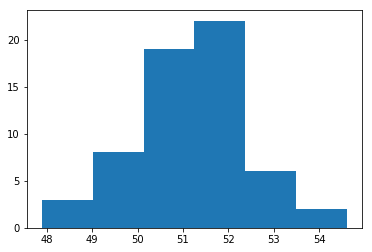

In [9]:
# Check with numpy here
import matplotlib.pyplot as plt
np.histogram(temperature_vector,6)
plt.hist(temperature_vector,bins=6)
plt.show()

**Your interpretation:** For 6 bins  histogram array is as follows [[3, 8, 19, 22, 6, 1], [47.9, 49.02, 50.13, 51.25, 52.37, 53.48, 54.6]] and the histogram is not skewed

## Part 2: Working with Matrices

For the second part of the homework, we are going to work with matrices. The [dataset we will use](https://www.wunderground.com/history/airport/KSLC/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=) contains different properties of the weather in Salt Lake City for 2015 (temperature, humidity, sea level, ...). It is stored in the file [`SLC_2015.csv`](SLC_2015.csv) in this repository.

We first read the data from the file and store it in a nested python array (`weather_matrix`). A nested python array is an array, where each element is an array itself. Here is a simple example: 

In [10]:
arr1 = [1,2,3]
arr2 = ['a', 'b', 'c']

nestedArr = [arr1, arr2]
nestedArr

[[1, 2, 3], ['a', 'b', 'c']]

We provide you with the import code, which will write the data into the nested list `temperature_matrix`. The list contains one list for each month, which, in turn, contain the mean temparature of every day of that month. 

In [11]:
# initialize the 12 arrays for the months
temperature_matrix = [[] for i in range(12)]

# open the file and append the values of the last column to the array
with open('SLC_2015.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # get rid of the header
    next(filereader)
    for row in filereader:
        month = int(row[0].split('/')[0])
        mean_temp = int(row[2])
        temperature_matrix[month-1].append(mean_temp)

print(temperature_matrix)

# the mean tempertarure on August 23. Note the index offset:
print("Mean temp on August 23: " + str(temperature_matrix[7][22]))

[[15, 19, 26, 28, 37, 38, 38, 36, 35, 31, 39, 36, 35, 30, 31, 31, 37, 44, 40, 35, 31, 31, 31, 33, 42, 41, 44, 42, 36, 40, 39], [39, 49, 50, 50, 53, 57, 60, 53, 55, 45, 43, 47, 46, 48, 43, 40, 38, 44, 47, 44, 39, 33, 31, 35, 44, 35, 37, 36], [40, 37, 34, 33, 39, 43, 45, 45, 46, 50, 54, 50, 51, 56, 62, 63, 61, 53, 47, 53, 57, 54, 52, 47, 42, 48, 56, 62, 53, 57, 63], [46, 44, 44, 54, 60, 50, 52, 46, 49, 53, 58, 50, 57, 56, 33, 44, 50, 54, 56, 56, 60, 61, 61, 59, 51, 46, 50, 57, 65, 63], [63, 71, 68, 67, 62, 59, 58, 57, 49, 53, 59, 68, 65, 65, 53, 48, 56, 58, 55, 59, 58, 58, 55, 57, 62, 59, 61, 61, 64, 71, 76], [80, 68, 69, 68, 69, 70, 66, 73, 77, 78, 72, 74, 75, 76, 81, 77, 78, 83, 83, 78, 81, 78, 78, 83, 82, 84, 87, 88, 91, 89], [87, 87, 87, 89, 79, 79, 76, 75, 73, 72, 77, 79, 81, 77, 80, 80, 79, 74, 74, 73, 76, 77, 75, 78, 78, 84, 77, 66, 70, 76, 79], [80, 79, 69, 76, 82, 74, 76, 69, 72, 79, 83, 81, 83, 88, 83, 79, 77, 72, 74, 76, 81, 74, 76, 84, 85, 78, 77, 80, 85, 82, 75], [82, 83, 82

We will now use the nested array `temperature_matrix` to compute the same metrics as in Part 1.

**Note:** Since the lists in the matrix are of varying lengths (28 to 31 days) many of the standard NumPy functions won't work.

### Task 2.1: Calculates the mean of a whole matrix

Write a function that calculates the mean of a matrix. For this version calculate the mean over all elements in the matrix as if it was one large vector. 
Pass in the matrix with the weather data and return the result. Provide a written interpretation of your results.
Can you use your function from Part 1 and get a valid result?

In [12]:
## your code goes here
def mean_mat(temprature_matrix):
    flat_data = [i for x in temperature_matrix for i in x]
    mat_mean=mean_list(flat_data)
    return mat_mean
mean_mat(temperature_matrix)

56.76712328767123

YES

In [13]:
# here we create a flat version of the matrix that works well for np checks
flat_data = [i for x in temperature_matrix for i in x]
np.mean(flat_data)
# check your data with nupy here

56.767123287671232

**Your Interpretation:** Mean of whole year is 56.76

### Task 2.2:  Calculate the mean of each vector of a matrix

Write a function that calculates the mean temperature of each month and returns an array with the means for each column. Provide a written interpretation of your results. Can you use the function you implemented in Part 1 here efficiently? If so, use it.

YES

In [14]:
## your code goes here
def mean_matcol(temperature_matrix):
    matcol=[]
    for i in temperature_matrix:
        list_mean=mean_list(i)
        matcol.append(round(list_mean,2))
    return matcol
mean_matcol(temperature_matrix)

[34.55,
 44.32,
 50.1,
 52.83,
 60.48,
 77.87,
 77.87,
 78.35,
 71.43,
 61.16,
 39.97,
 31.55]

**Your Interpretation:** Mean of each month is [34.55,44.32,50.1,52.83,60.48,77.87,77.87,78.35,71.43,61.16,39.97,31.55]

### Task 2.3:  Calculate the median of a whole matrix

Write a function that calculates and returns the median of a matrix over all values (independent from which row they are coming) and returns it. Provide a written interpretation of your results. Can you use your function from Part 1 and get a valid result?

In [15]:
## your code goes here
def median_mat(temperature_matrix):
    flat_data = [i for x in temperature_matrix for i in x]
    return median_list(flat_data)
median_mat(temperature_matrix)

57

In [16]:
YES

NameError: name 'YES' is not defined

In [ ]:
## check with numpy here
def numpy_median(temperature_matrix):
    flat_data = [i for x in temperature_matrix for i in x]
    return np.median(flat_data)    
   
numpy_median(temperature_matrix)

**Your Interpretation:** Median of whole year is 57

### Task 2.4: Calculate the median of each vector of a matrix

Write a function that calculates the median of each sub array (i.e. each column in the csv file) in the matrix and returns an array of medians (one entry for column in the csv file). To do so, use the function you implemented in Part 1. Provide a written interpretation of your results. 

In [ ]:
## your code goes here
def median_matcol(temperature_matrix):
    matcl=[]
    for i in temperature_matrix:
        list_median=median_list(i)
        matcl.append(list_median)
    return matcl
median_matcol(temperature_matrix)

**Your Interpretation:** Median of each month is [36, 44.0, 51, 53.5, 59, 78.0, 77, 79, 73.0, 62, 40.0, 32]

### Task 2.5: Calculate the standard deviation of a whole matrix

Write a function that calculates the standard deviation of a matrix over all values in the matrix (ignoring from which column they were coming) and returns it. Can you use your function from Part 1 and get a valid result? Provide a written interpretation of your results. 

In [ ]:
## your code goes here
def mat_std_dev(temperature_matrix):
    flat_data = [i for x in temperature_matrix for i in x]
    return std_dev(flat_data)
mat_std_dev(temperature_matrix)

In [ ]:
# Check with numpy here
def numpy_std(temperature_matrix):
    flat_data = [i for x in temperature_matrix for i in x]
    return np.std(flat_data)
numpy_std(temperature_matrix)

**Your Interpretation:** Standard devation of whole year is 17.90

### Task 2.6: Calculate the standard deviation of each vector of a matrix

Write a function that calculates the standard deviation of each array in the matrix and returns an array of standard deviations (one standard deviation for each column). To do so, use the function you implemented in Part 1.
Pass in the matrix with the temperature data and return the result. Provide a written interpretation of your results - is the standard deviation consistent across the seasons? 

No the standard devation is not consistent

In [ ]:
## your code goes here
def mat_std_devcl(temperature_matrix):
    std_mat=[]
    for i in temperature_matrix:
        list_std=std_dev(i)
        std_mat.append(round(list_std,2))
    return std_mat
mat_std_devcl(temperature_matrix)

**Your Interpretation:** Standard devation of each month is [6.5, 7.34, 8.26, 6.92, 6.27, 6.54, 5.02, 4.67, 7.55, 6.94, 8.72, 8.97]

## Part 3: Poisson distribution 

Another example of a discrete random variable is a Poisson random variable. 

Read the [wikipedia article on the Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

**3.1 Descriptive statistics.** Describe what a Poisson random variable is. What is the parameter, $\lambda$? What is the min, max, mean, and variance of a Poisson random variable? 

Poission random variable is said to have poissions distribution with parameter lambda.Lambda is the mean number of events per interval it is also called parameter of distribution. Mean is lambda and also the variance. Minumum from the set of the random variable and maximum fro the set of the random variable are min and max

**3.2 Example.** Give an example of an application that is described by a Poisson random variable.

Telephone calls arriving in the system,  number of goals in sport involving two teams 

**3.3 Probability Mass Function.** For the parameter $\lambda = 2$, plot the probability mass function. 

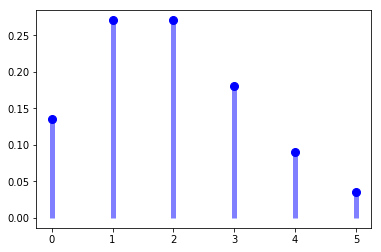

In [19]:
# your code
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
lamda=2.0
x = np.arange(poisson.ppf(0.01, lamda),poisson.ppf(0.99, lamda))
ax.plot(x, poisson.pmf(x, lamda), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, lamda), colors='b', lw=5, alpha=0.5)
plt.show()


**3.4 Poission sampling.** Write python code that takes 1000 samples from the Poisson distribution with parameter $\lambda = 2$. Make a histogram of the samples and compute the sample mean and variance. How does the histogram compare to the probability mass function?

In [ ]:
# your code
r = poisson.rvs(lamda, size=1000)
plt.hist(r, bins=8,normed=True)
plt.title("A histogram of poission random variables")
plt.show()

In [20]:
import numpy as np
from scipy.stats import poisson
print(poisson.mean(lamda))
print(poisson.var(lamda))

2.0
2.0


Histogram is similar as Probability mass function